From Compton et al. "Understanding voltammetry: simulation of electrode processes", 2014

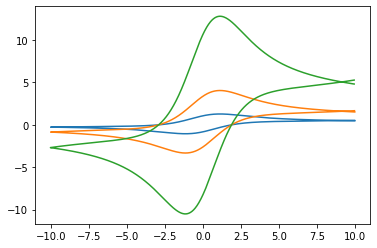

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sim(sigma):

    #Specify simulation parameters
    theta_i = 10.0
    theta_v = -10.0
    deltaX = 2e-3
    deltaTheta = 0.02

    #Calculate other parameters
    deltaT = deltaTheta / sigma
    maxT = 2 * np.abs(theta_v - theta_i) / sigma
    maxX = 6*np.sqrt(maxT)
    n = int( maxX / deltaX ) # number of spacesteps
    m = int( maxT / deltaT ) # number of timesteps

    # Calculate Thomas coefficients
    wambda = deltaT / (deltaX**2)
    alpha = -wambda
    beta = 2.0*wambda + 1.0
    gamma = -wambda

    # Create containers
    g_mod = np.zeros(n)
    C = np.zeros(n)# concentration profile
    Thetas = np.zeros(m)
    fluxes = np.zeros(m)

    #Modify gamma coefficients 
    g_mod[0] = 0 # boundary condition
    for i in range(1,n):
        g_mod[i] = gamma / (beta - g_mod[i-1] * alpha)
        i+=1

    # BEGIN SIMULATION
    Theta = theta_i

    for k in range(m*2) :
        if( k%m < m / 2 ):
            Theta -= deltaTheta
        else:
            Theta += deltaTheta

        # Forward sweep - create modified deltas
        C[0] = (1.0 / (1.0 + np.exp(-Theta)))

        for i in range(1,n-1):
            C[i] = (( C[i] - C[i-1] * alpha ) / ( beta - g_mod[i-1] * alpha ))
            i+=1

        # Back Substitution
        C[n-1] = 1.0

        for i in np.arange(n-2,-1,-1):

            C[i] = C[i] - g_mod[i] * C[i+1]
            i-=1

        #Output current
        flux = -(-C[2] + 4*C[1] -3*C[0]) / (2*deltaX) 

        if(k>=m):
            fluxes[k%m] = flux
            Thetas[k%m] = Theta

        k+=1

    return Thetas, fluxes
    # END SIMULATION
Thetas, Fluxes = sim(10)
plt.plot(Thetas, Fluxes)
Thetas, Fluxes = sim(100)
plt.plot(Thetas, Fluxes)
Thetas, Fluxes = sim(1000)
plt.plot(Thetas, Fluxes)